#Optimizing Healthcare Expenditure Forecasting Through Machine Learning Models: A Case Study on Medical Insurance Costs

##1.Project Overview

This project aims to develop a predictive model for estimating medical insurance costs based on key personal and lifestyle factors of individuals. Accurate prediction of healthcare expenditures is crucial for insurance companies, healthcare providers, and policymakers to optimize resource allocation, manage risk, and tailor premium pricing.

In this project, various machine learning models will be explored and evaluated to determine the best approach for predicting insurance charges. The goal is to leverage these models to understand the relationship between different personal attributes and insurance costs, providing insights that can enhance decision-making in the healthcare and insurance industries.

##2.Data Information

https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

The dataset used in this project comprises 1338 rows of data, representing various insured individuals. The primary target variable is the Insurance charges, which are predicted based on the following attributes:
- **Age**: The age of the insured individual.
- **Sex**: Gender of the insured individual (male or female).
- **BMI**: Body Mass Index, a measure of body fat based on height and weight.
- **Number of Children**: The number of children/dependents covered by the insurance.
- **Smoker**: Whether the insured is a smoker (yes or no).
- **Region**: The geographical region where the insured resides.


##3.Data Inspecting and Preprocessing

In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [4]:
# Loading the dataset
file_path = 'insurance.csv'
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check its rows and columns
df.shape

(1338, 7)

In [6]:
# Check its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Check its missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
# Check its duplication
df.duplicated().sum()

1

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

##4.Exploratory Data Analysis (EDA)

###Correlation Heatmap

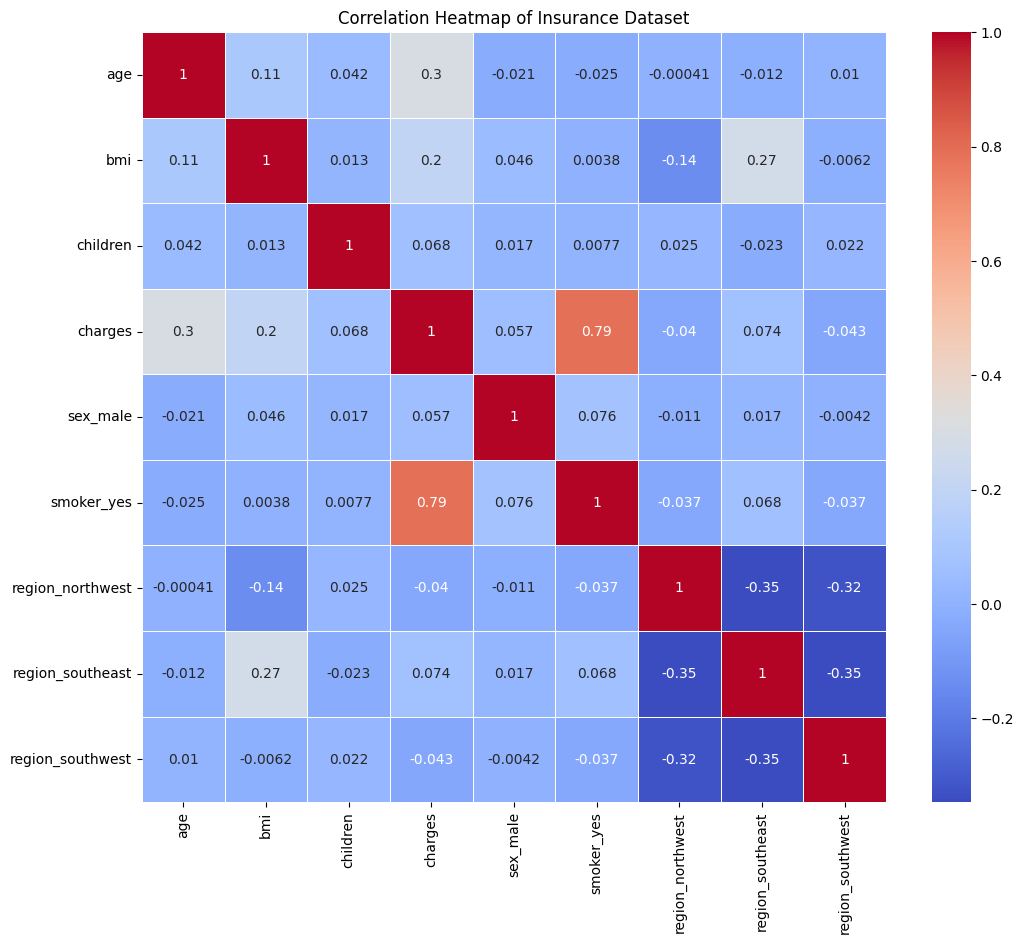

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Insurance Dataset")
plt.show()

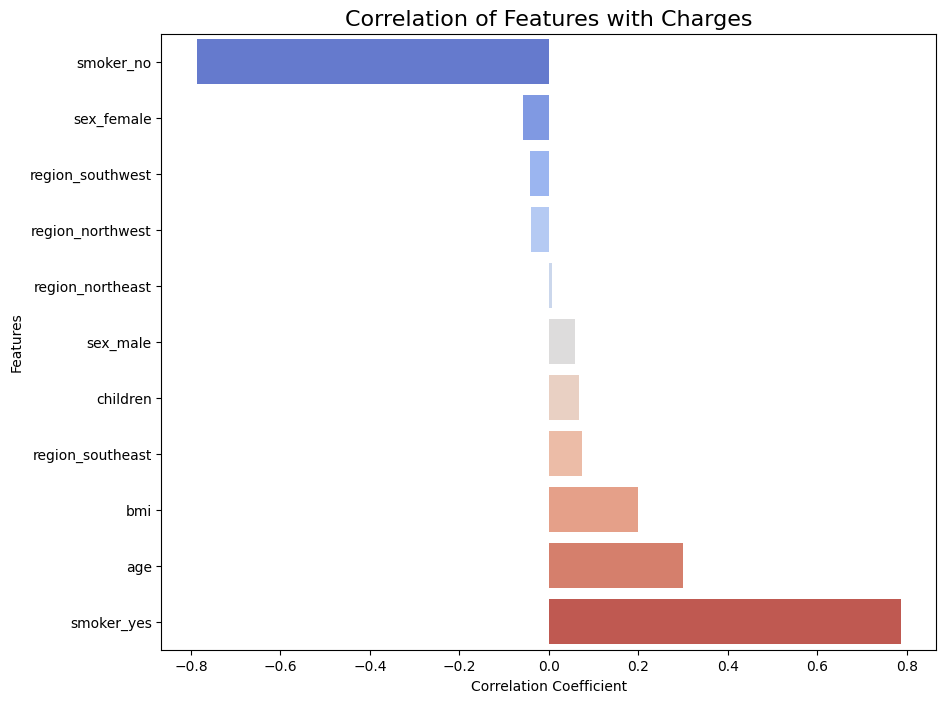

In [12]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=False)

# Calculate the correlation of each feature with the target variable 'charges'
correlations = df_encoded.corr()['charges'].drop('charges').sort_values()

# Plotting the horizontal bar chart for correlations with 'charges'
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation of Features with Charges', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

###Pairplot

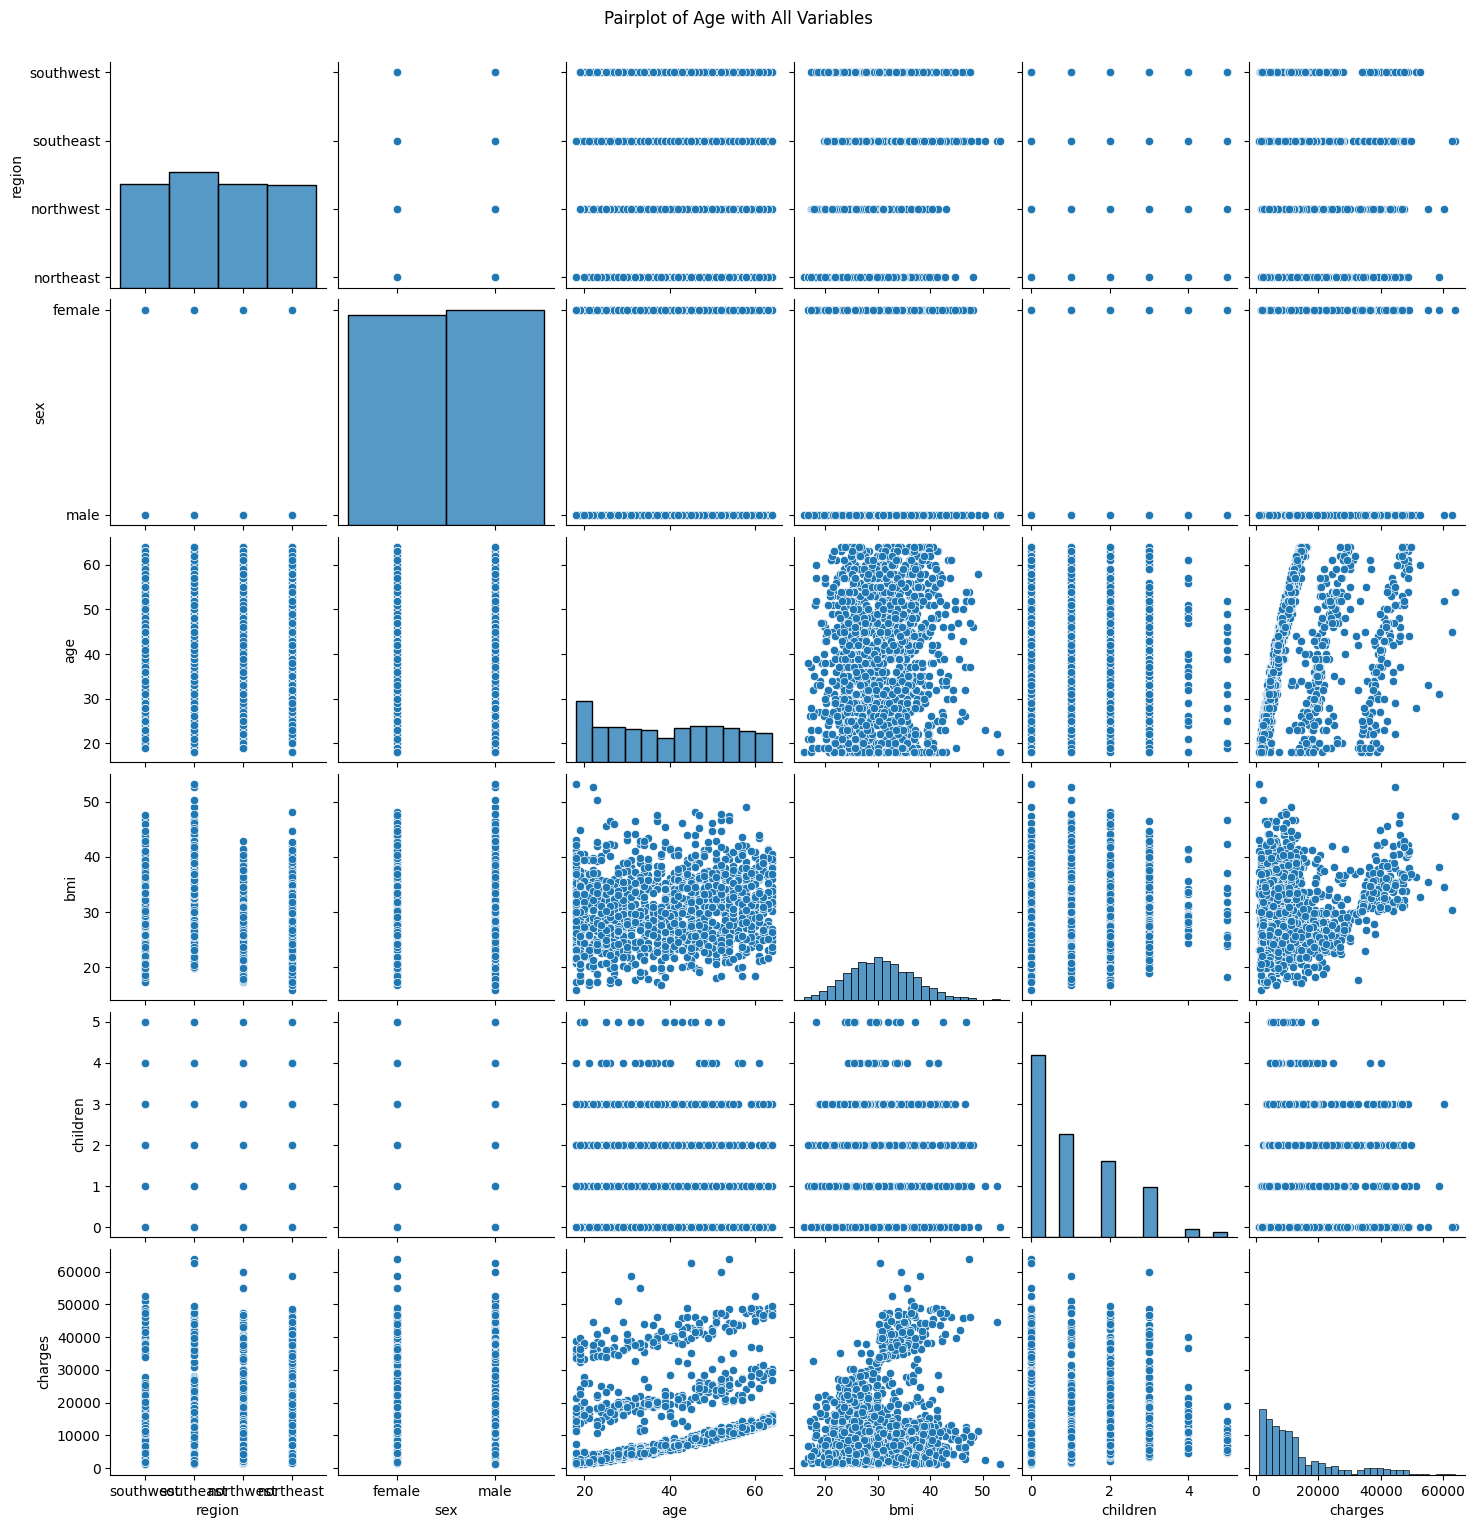

In [13]:
# Pairplot of age with all variables
pairplot = sns.pairplot(df, vars=['region','sex','age', 'bmi', 'children', 'charges'])
pairplot.fig.suptitle('Pairplot of Age with All Variables', y=1.02)  # y=1.02 adjusts the title position
plt.show()

###charges (Target Variable)

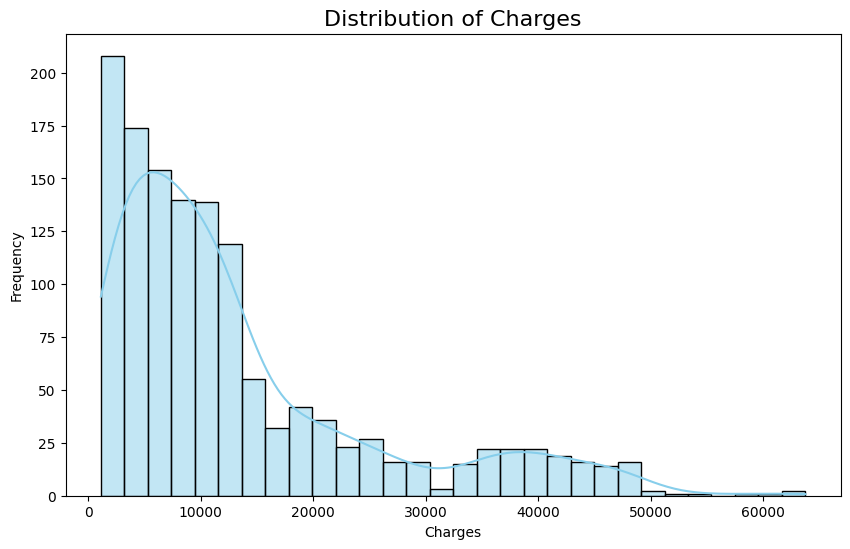

In [14]:
# Histogram of charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='skyblue')
plt.title('Distribution of Charges', fontsize=16)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

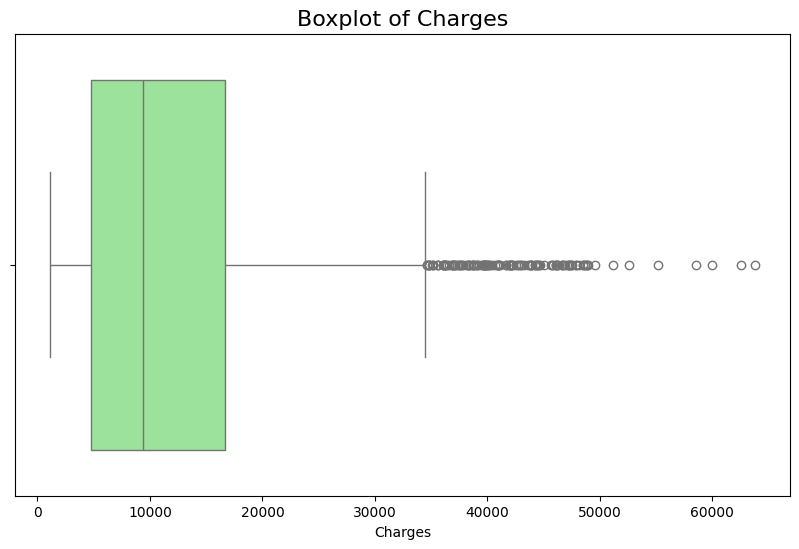

In [15]:
# Boxplot of charges
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['charges'], color='lightgreen')
plt.title('Boxplot of Charges', fontsize=16)
plt.xlabel('Charges')
plt.show()

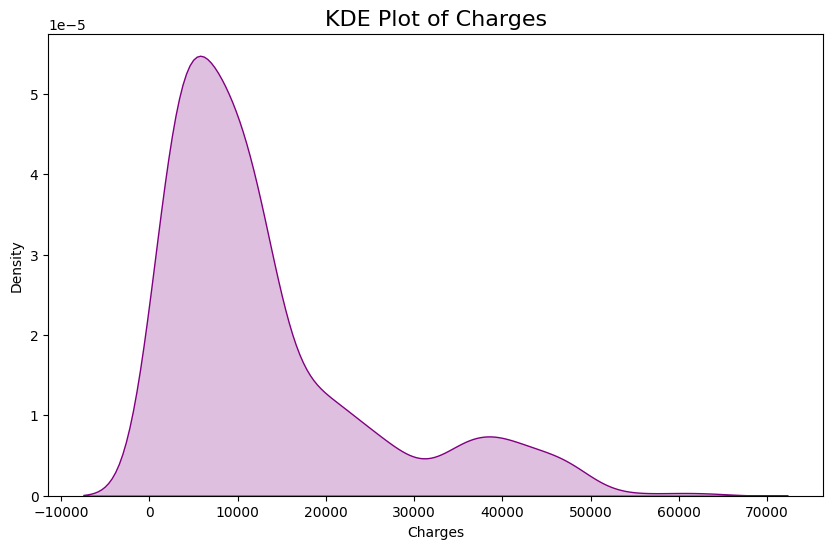

In [16]:
# KDE plot of charges
plt.figure(figsize=(10, 6))
sns.kdeplot(df['charges'], shade=True, color='purple')
plt.title('KDE Plot of Charges', fontsize=16)
plt.xlabel('Charges')
plt.ylabel('Density')
plt.show()

###age

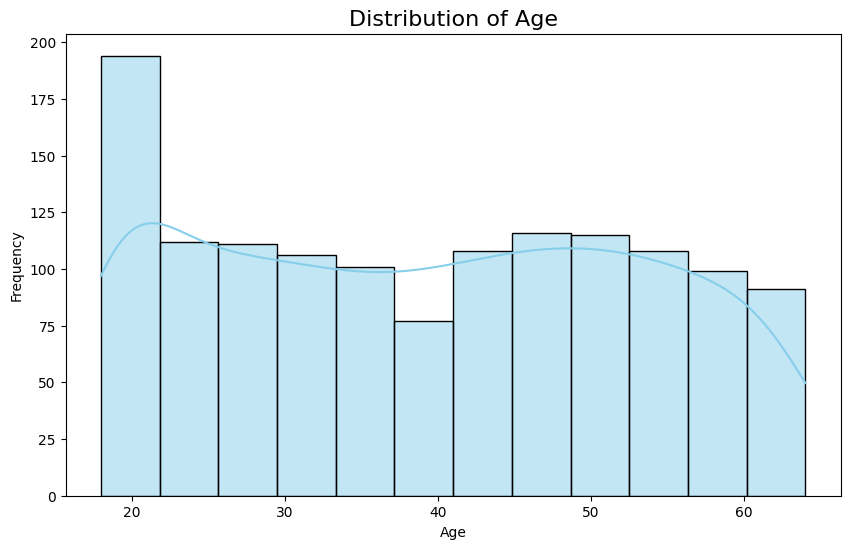

In [17]:
# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


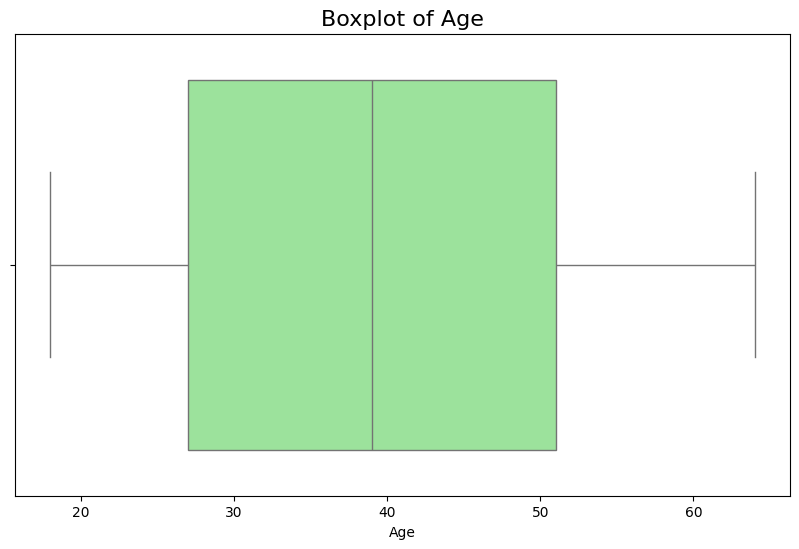

In [18]:
# Boxplot of age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'], color='lightgreen')
plt.title('Boxplot of Age', fontsize=16)
plt.xlabel('Age')
plt.show()

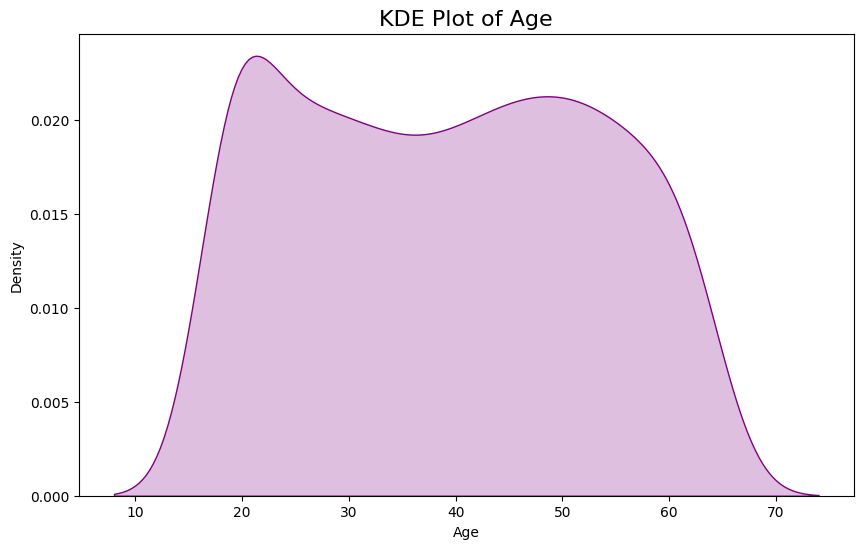

In [19]:
# KDE plot of age
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], shade=True, color='purple')
plt.title('KDE Plot of Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

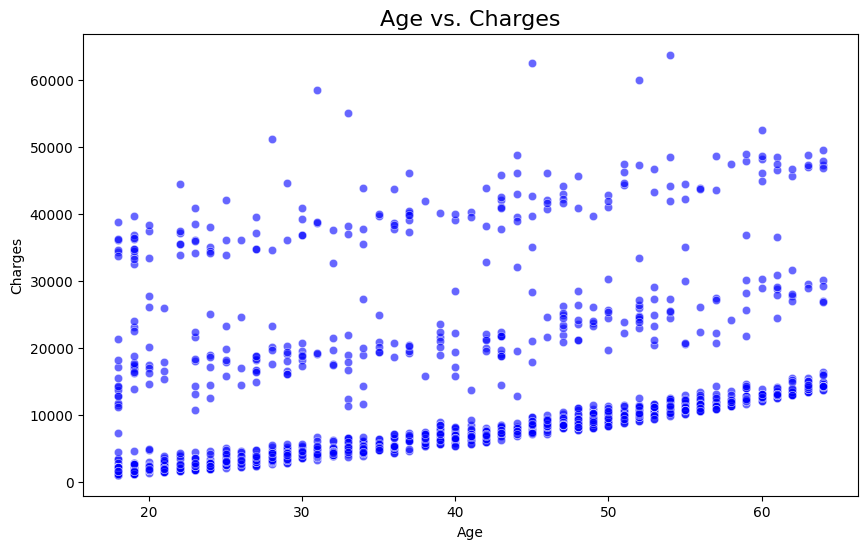

In [20]:
# Scatter plot of age vs. charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, color='blue', alpha=0.6)
plt.title('Age vs. Charges', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

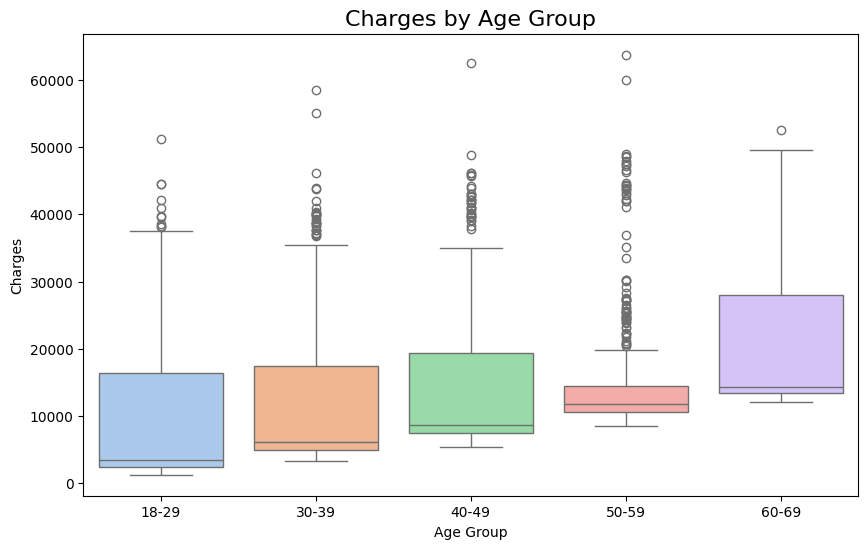

In [22]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[18, 29, 39, 49, 59, 69], labels=['18-29', '30-39', '40-49', '50-59', '60-69'])

# Boxplot of charges by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='charges', data=df, palette='pastel')
plt.title('Charges by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.show()

In [23]:
df.drop(columns=['age_group'], inplace=True)

In [24]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

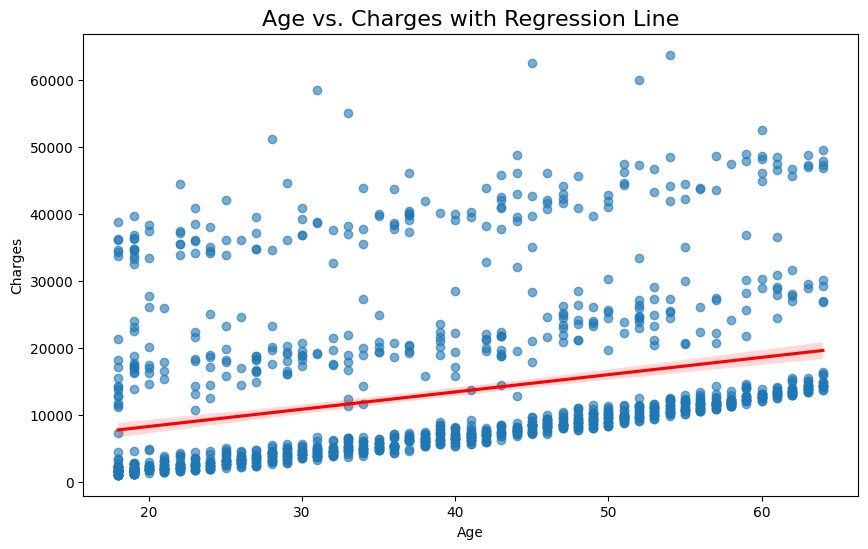

In [25]:
# Regression plot of age vs. charges
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title('Age vs. Charges with Regression Line', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

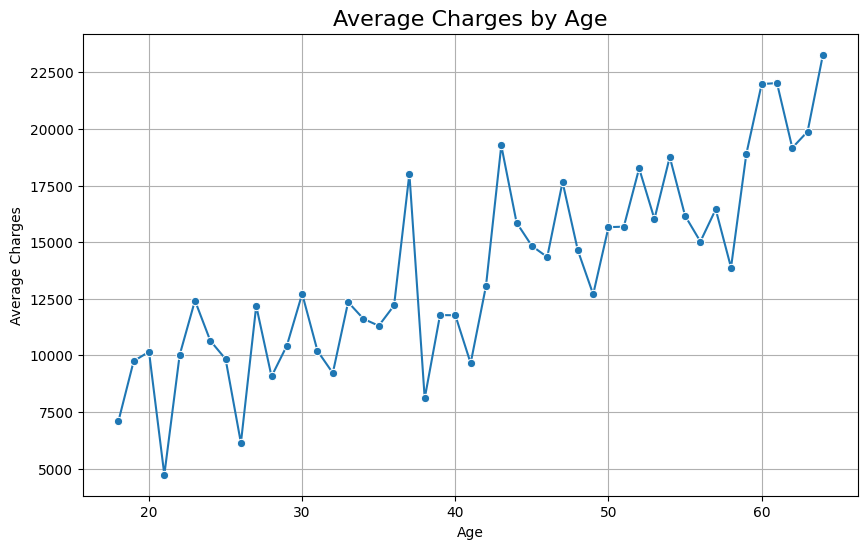

In [26]:
# Calculate the average charges for each age
age_charges = df.groupby('age')['charges'].mean().reset_index()

# Line plot of age vs. average charges
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', data=age_charges, marker='o')
plt.title('Average Charges by Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

###sex

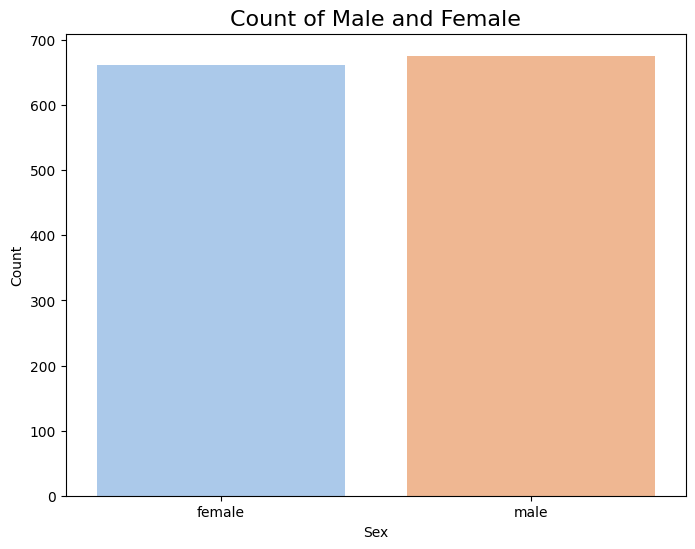

In [27]:
# Count plot of sex
plt.figure(figsize=(8, 6))
sns.countplot(x=df['sex'], palette='pastel')
plt.title('Count of Male and Female', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


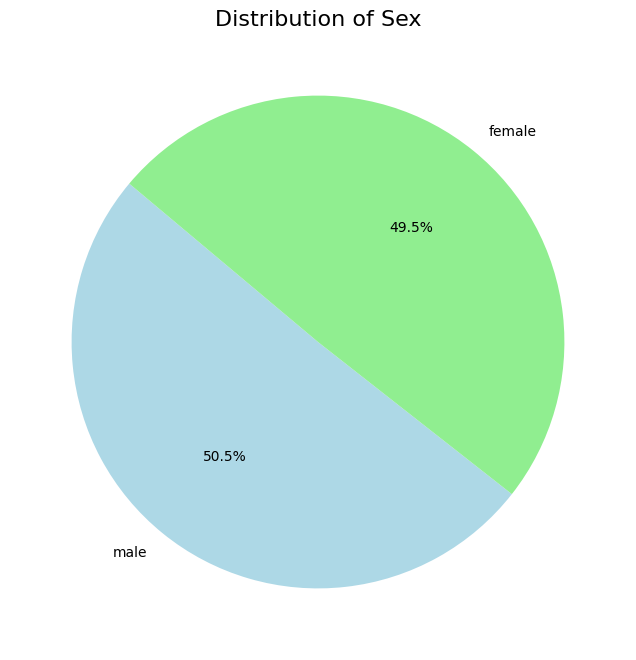

In [28]:
# Calculate the distribution of sex
sex_distribution = df['sex'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=140)
plt.title('Distribution of Sex', fontsize=16)
plt.show()

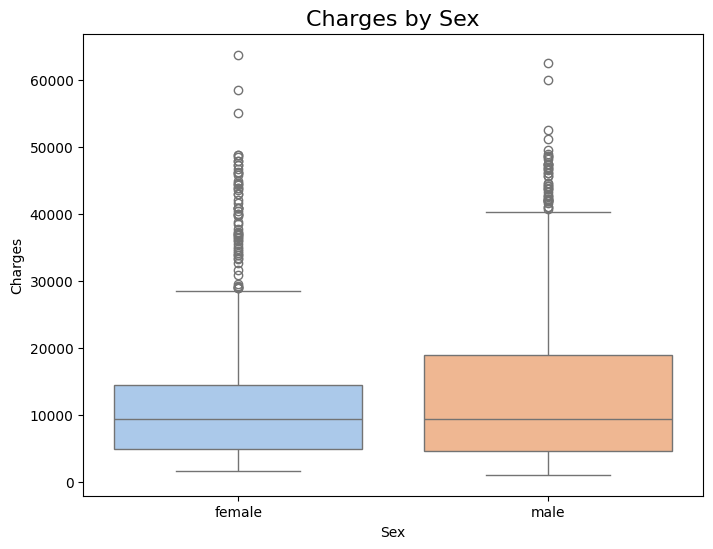

In [29]:
# Boxplot of charges by sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df, palette='pastel')
plt.title('Charges by Sex', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

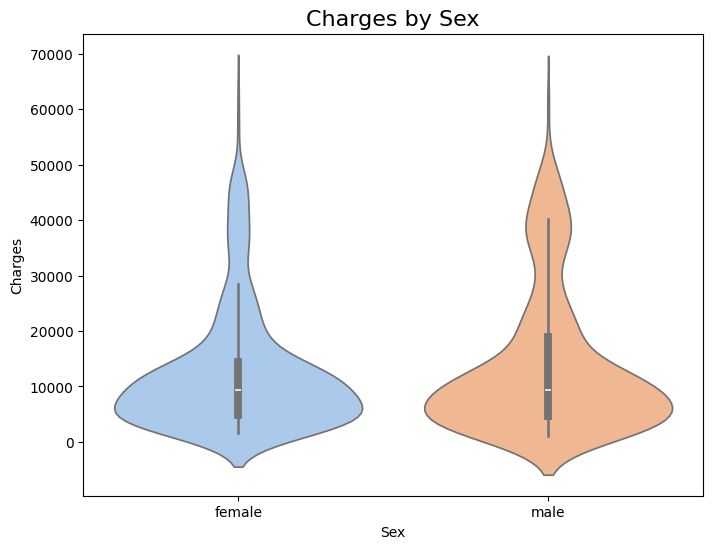

In [30]:
# Violin plot of charges by sex
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='charges', data=df, palette='pastel')
plt.title('Charges by Sex', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

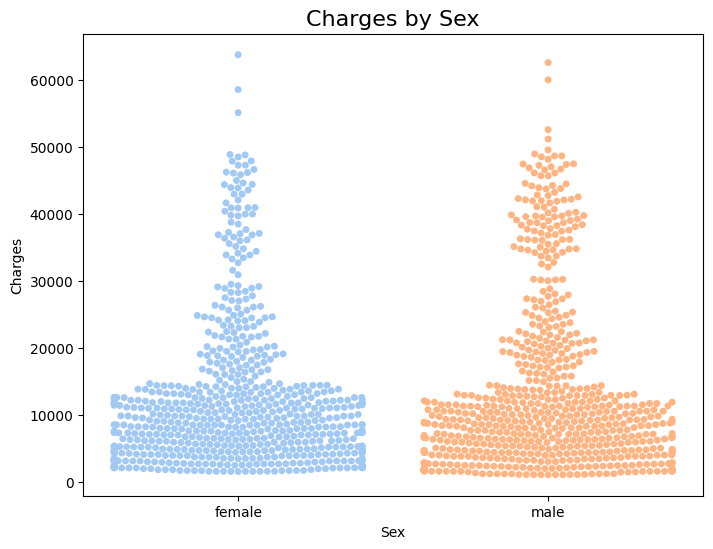

In [31]:
# Swarm plot of charges by sex
plt.figure(figsize=(8, 6))
sns.swarmplot(x='sex', y='charges', data=df, palette='pastel')
plt.title('Charges by Sex', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

###bmi

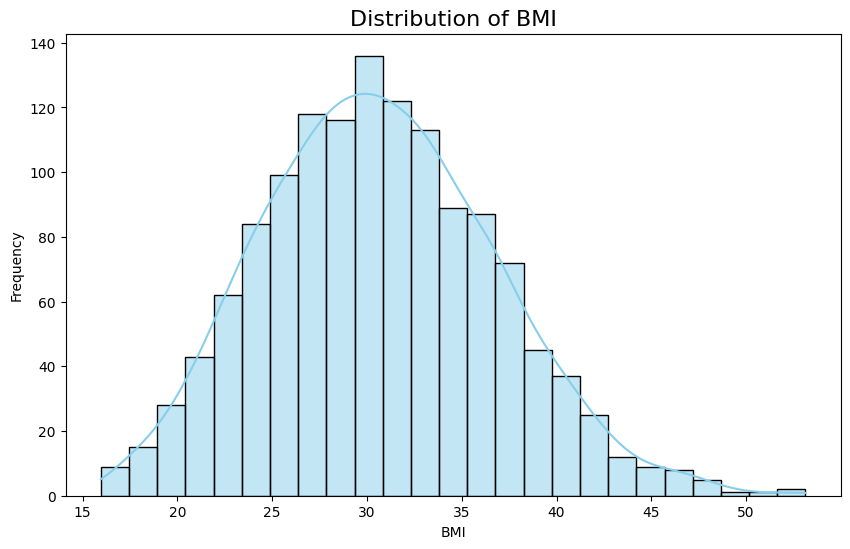

In [32]:
# Histogram of bmi
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, color='skyblue')
plt.title('Distribution of BMI', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

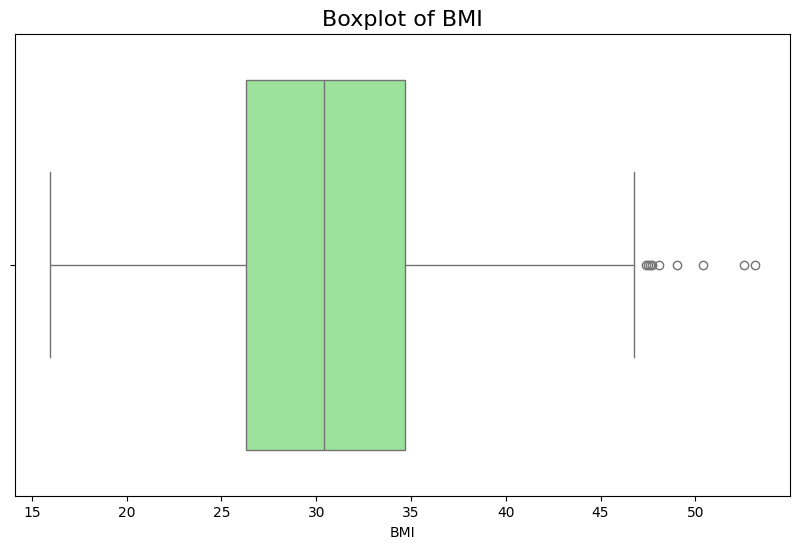

In [33]:
# Boxplot of bmi
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bmi'], color='lightgreen')
plt.title('Boxplot of BMI', fontsize=16)
plt.xlabel('BMI')
plt.show()

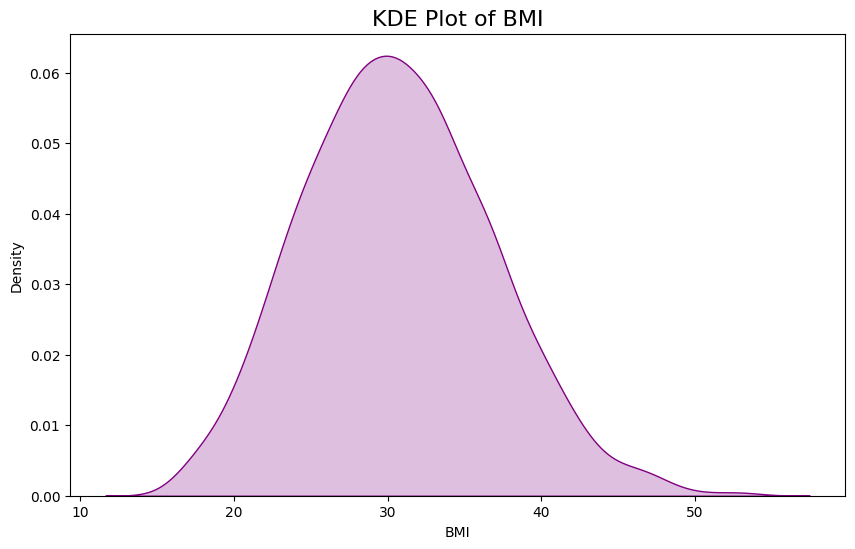

In [34]:
# KDE plot of bmi
plt.figure(figsize=(10, 6))
sns.kdeplot(df['bmi'], shade=True, color='purple')
plt.title('KDE Plot of BMI', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

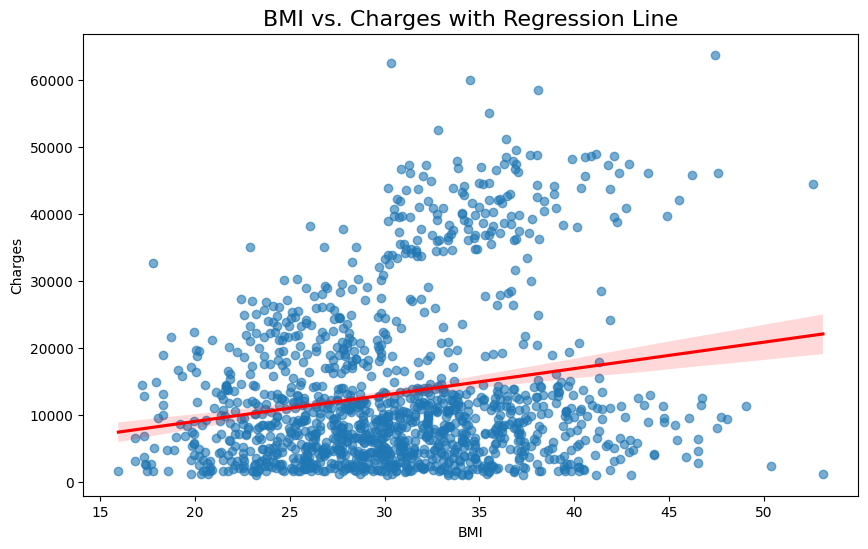

In [35]:
# Scatter plot with regression line of bmi vs. charges
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title('BMI vs. Charges with Regression Line', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

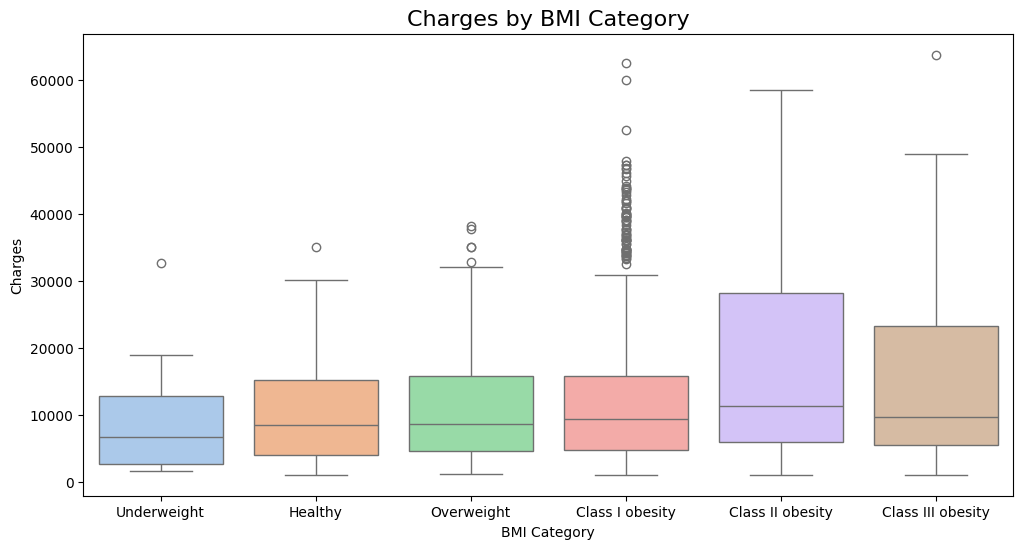

In [36]:
# Create BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Class I obesity', 'Class II obesity', 'Class III obesity']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Boxplot of charges by BMI category
plt.figure(figsize=(12, 6))
sns.boxplot(x='bmi_category', y='charges', data=df, palette='pastel')
plt.title('Charges by BMI Category', fontsize=16)
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.show()

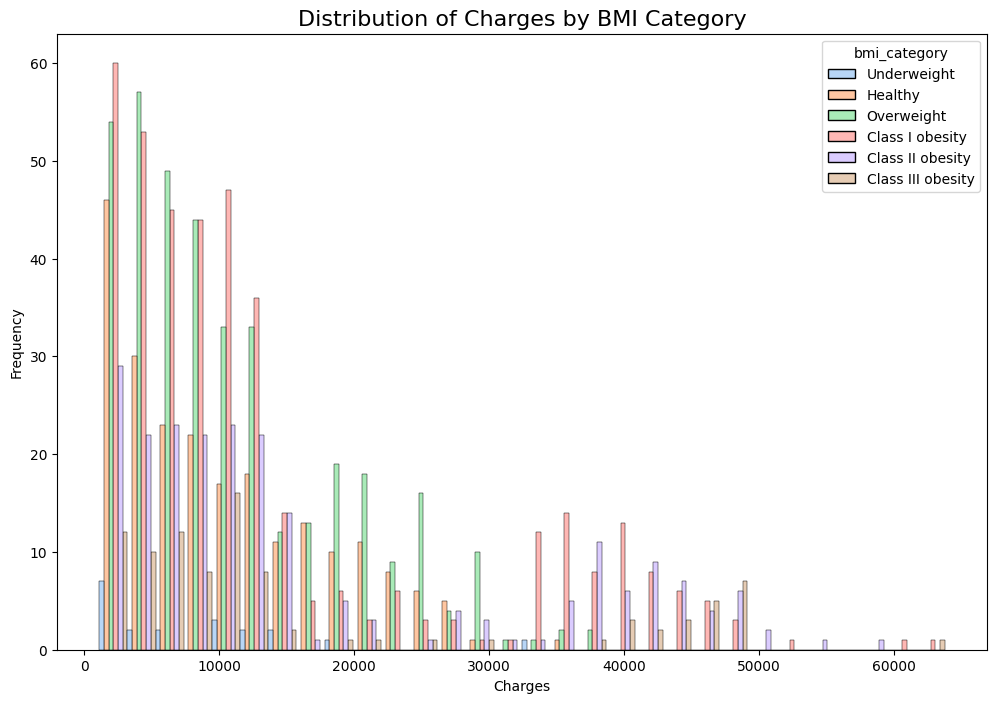

In [37]:
# Histogram of charges by BMI category
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='charges', hue='bmi_category', multiple='dodge', palette='pastel', kde=False)
plt.title('Distribution of Charges by BMI Category', fontsize=16)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

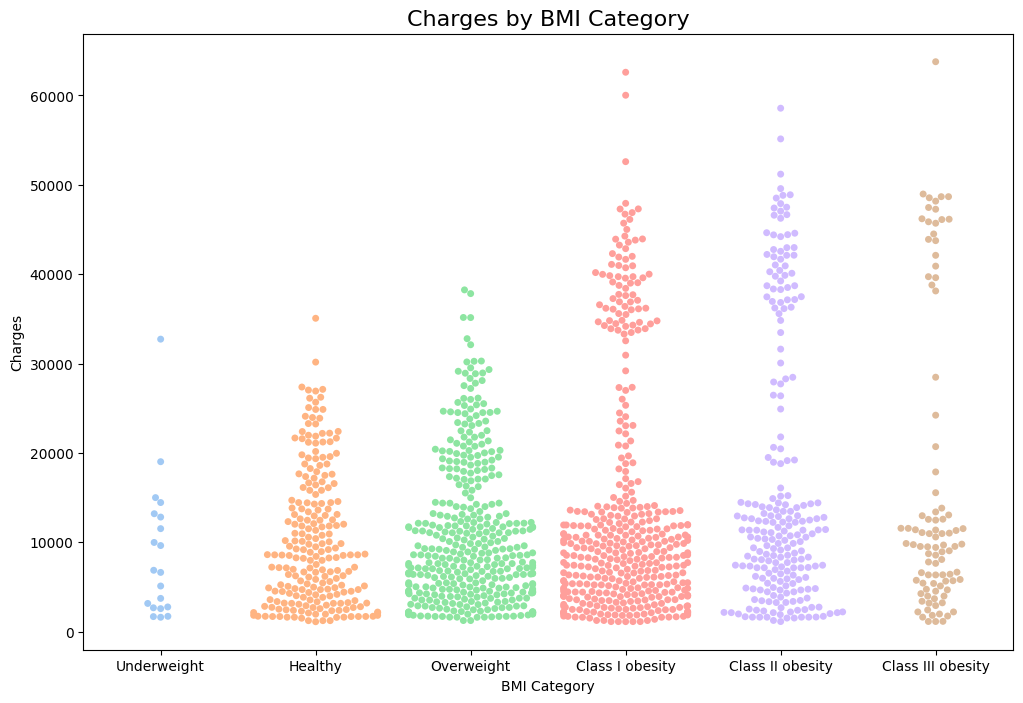

In [38]:
# Swarm plot of charges by BMI category
plt.figure(figsize=(12, 8))
sns.swarmplot(x='bmi_category', y='charges', data=df, palette='pastel', size=5)
plt.title('Charges by BMI Category', fontsize=16)
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.show()

In [39]:
# Calculate the average charges for each BMI category
bmi_charges = df.groupby('bmi_category')['charges'].mean().reset_index()
bmi_charges.columns = ['BMI Category', 'Average Charges']
bmi_charges

,BMI Category,Average Charges
0,Underweight,8852.200585
1,Healthy,10379.499732
2,Overweight,11030.331700
3,Class I obesity,14119.594060
4,Class II obesity,17186.363005
5,Class III obesity,17002.775729


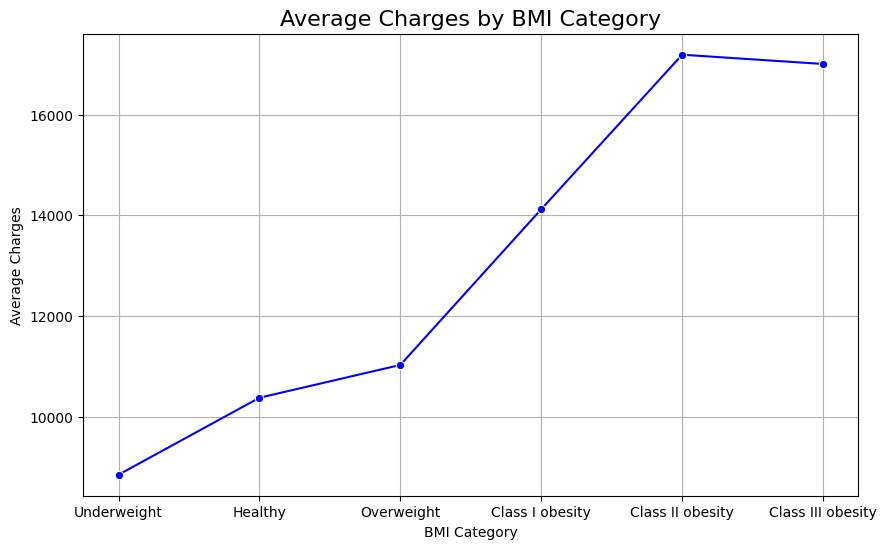

In [41]:
# Line plot of average charges by BMI category
bmi_charges = df.groupby('bmi_category')['charges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='bmi_category', y='charges', data=bmi_charges, marker='o', color='blue')
plt.title('Average Charges by BMI Category', fontsize=16)
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

In [42]:
df.drop(columns=['bmi_category'], inplace=True)

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

###children

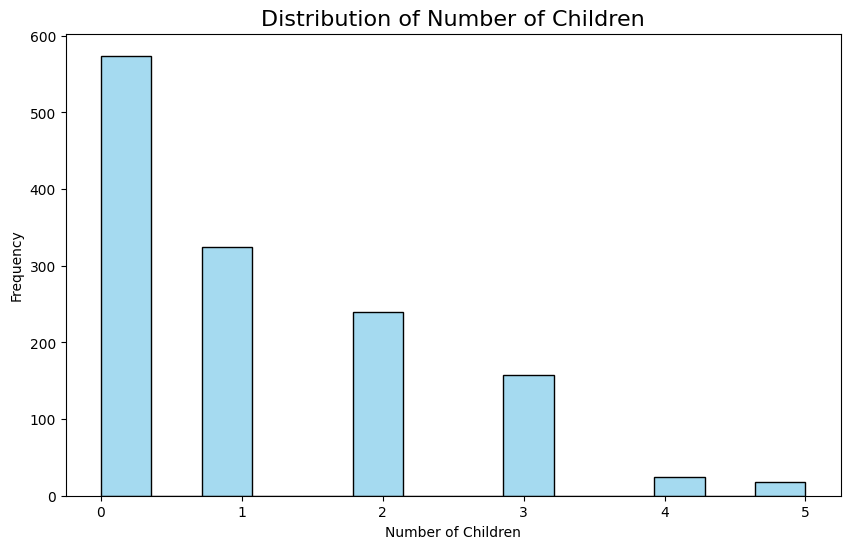

In [44]:
# Histogram of children
plt.figure(figsize=(10, 6))
sns.histplot(df['children'], kde=False, color='skyblue')
plt.title('Distribution of Number of Children', fontsize=16)
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

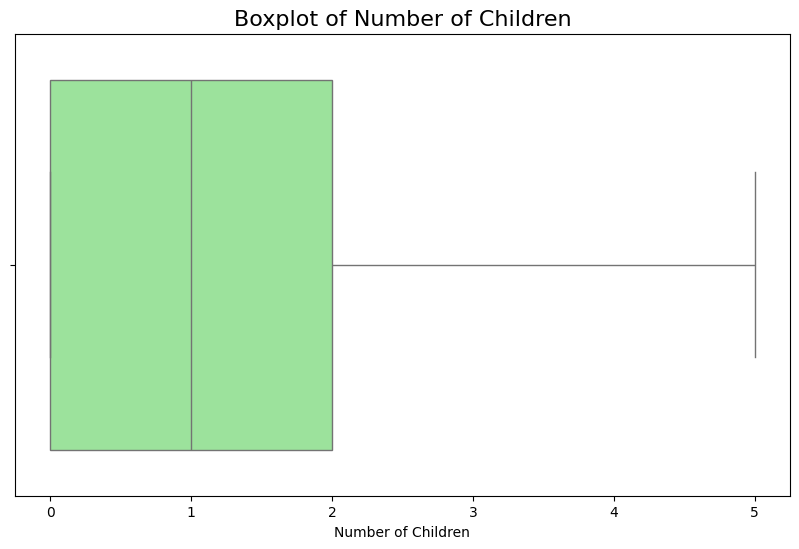

In [45]:
# Boxplot of children
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['children'], color='lightgreen')
plt.title('Boxplot of Number of Children', fontsize=16)
plt.xlabel('Number of Children')
plt.show()

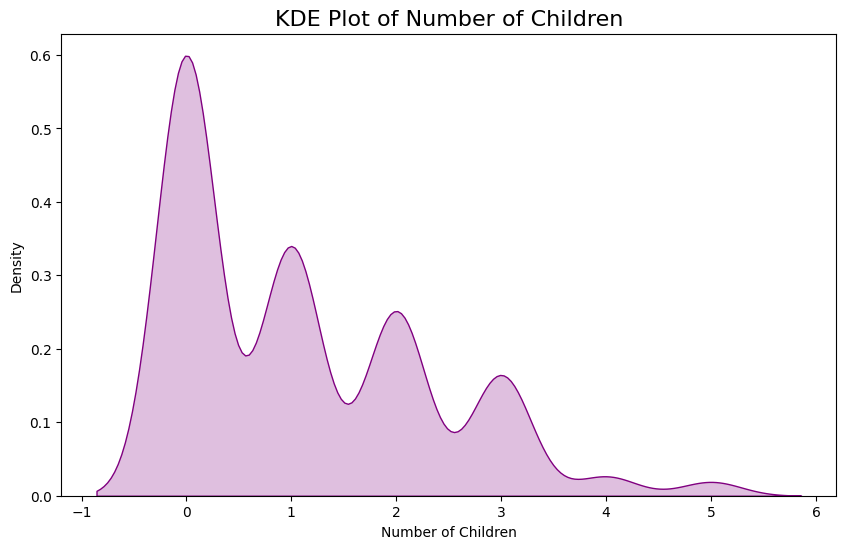

In [46]:
# KDE plot of children
plt.figure(figsize=(10, 6))
sns.kdeplot(df['children'], shade=True, color='purple')
plt.title('KDE Plot of Number of Children', fontsize=16)
plt.xlabel('Number of Children')
plt.ylabel('Density')
plt.show()

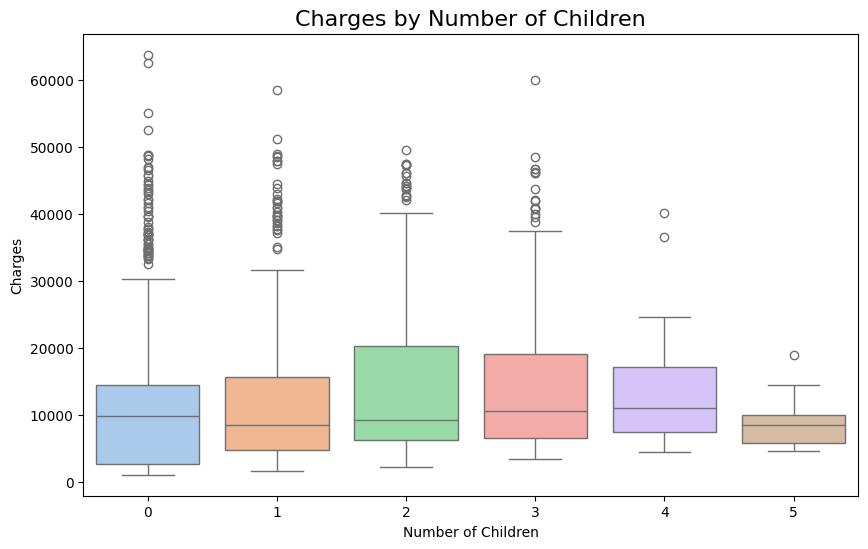

In [47]:
# Boxplot of charges by number of children
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df, palette='pastel')
plt.title('Charges by Number of Children', fontsize=16)
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

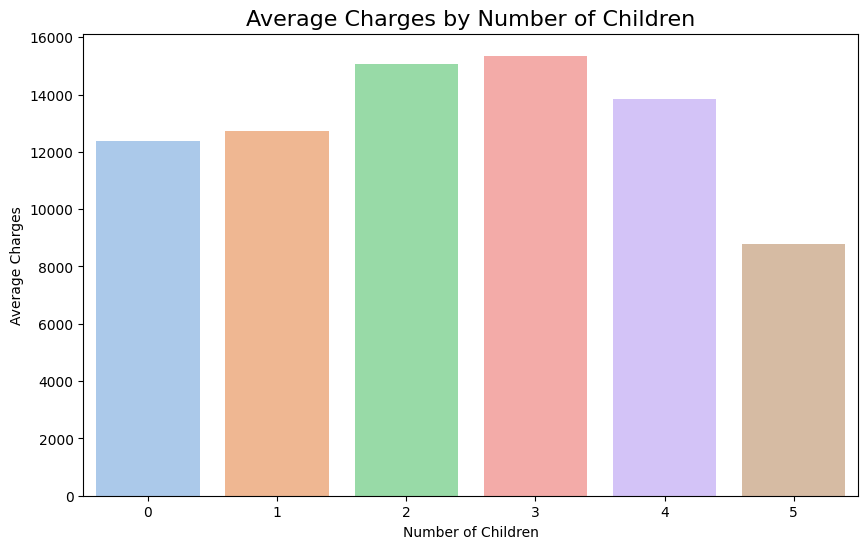

In [48]:
# Calculate the average charges for each number of children
children_charges = df.groupby('children')['charges'].mean().reset_index()

# Bar plot of average charges by number of children
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=children_charges, palette='pastel')
plt.title('Average Charges by Number of Children', fontsize=16)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

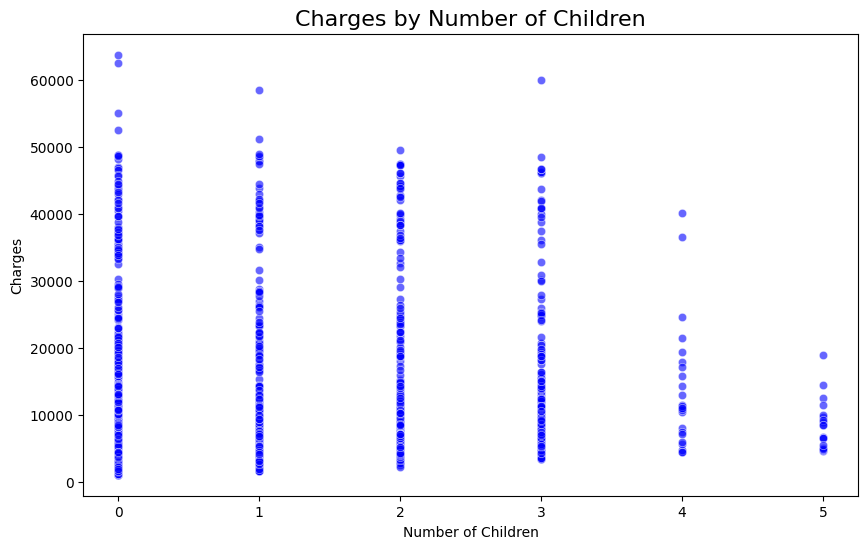

In [49]:
# Scatter plot of charges by number of children
plt.figure(figsize=(10, 6))
sns.scatterplot(x='children', y='charges', data=df, color='blue', alpha=0.6)
plt.title('Charges by Number of Children', fontsize=16)
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

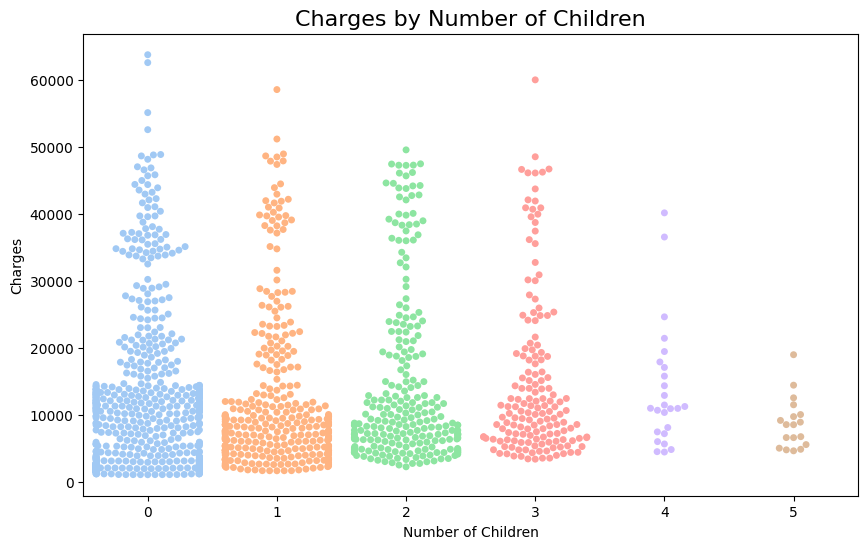

In [50]:
# Swarm plot of charges by number of children
plt.figure(figsize=(10, 6))
sns.swarmplot(x='children', y='charges', data=df, palette='pastel', size=5)
plt.title('Charges by Number of Children', fontsize=16)
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

In [51]:
# Calculate the average charges for each number of children
children_charges = df.groupby('children')['charges'].mean().reset_index()
children_charges.columns = ['Number of Children', 'Average Charges']
children_charges

,Number of Children,Average Charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


In [52]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

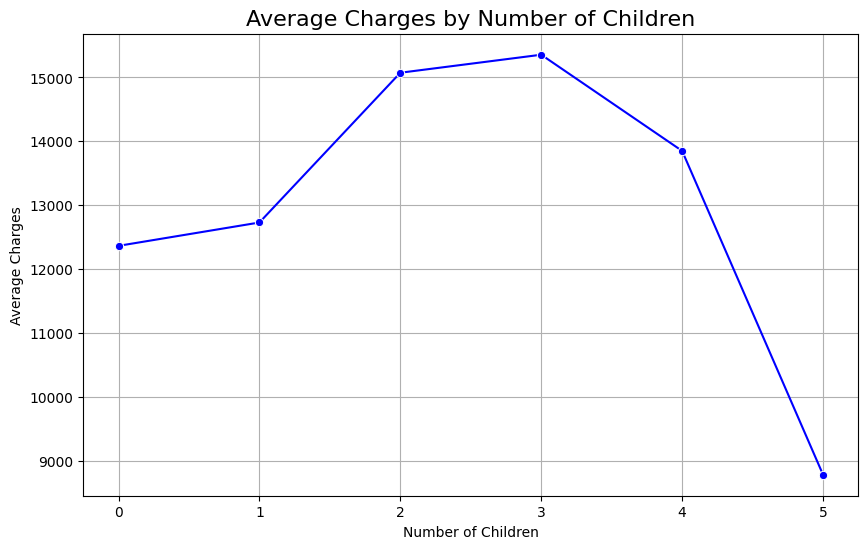

In [53]:
# Line plot of average charges by number of children
children_charges = df.groupby('children')['charges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='children', y='charges', data=children_charges, marker='o', color='blue')
plt.title('Average Charges by Number of Children', fontsize=16)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

###smoker

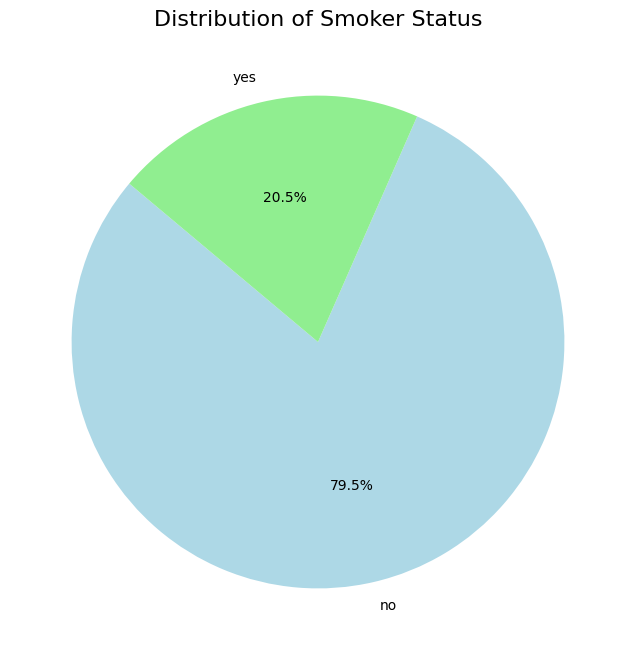

In [54]:
# Calculate the distribution of smoker status
smoker_distribution = df['smoker'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(smoker_distribution, labels=smoker_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=140)
plt.title('Distribution of Smoker Status', fontsize=16)
plt.show()

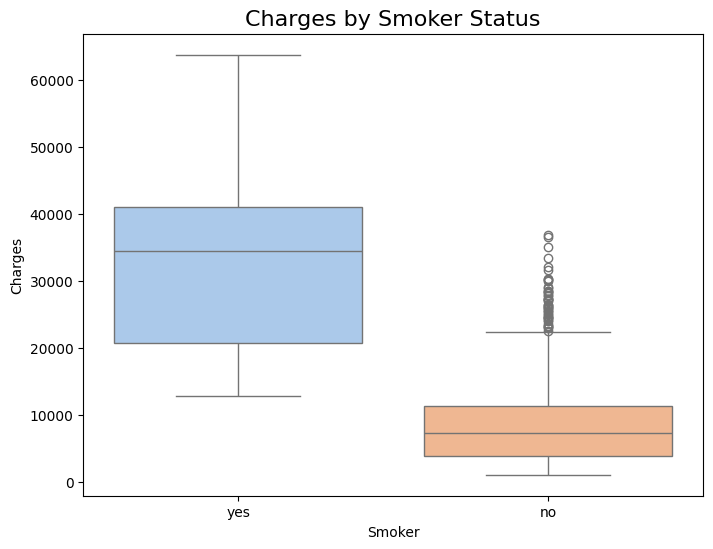

In [56]:
# Boxplot of charges by smoker status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')
plt.title('Charges by Smoker Status', fontsize=16)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [55]:
# Calculate the average charges for smokers and non-smokers
smoker_charges = df.groupby('smoker')['charges'].mean().reset_index()
smoker_charges.columns = ['Smoker', 'Average Charges']
smoker_charges

,Smoker,Average Charges
0,no,8434.268298
1,yes,32050.231832


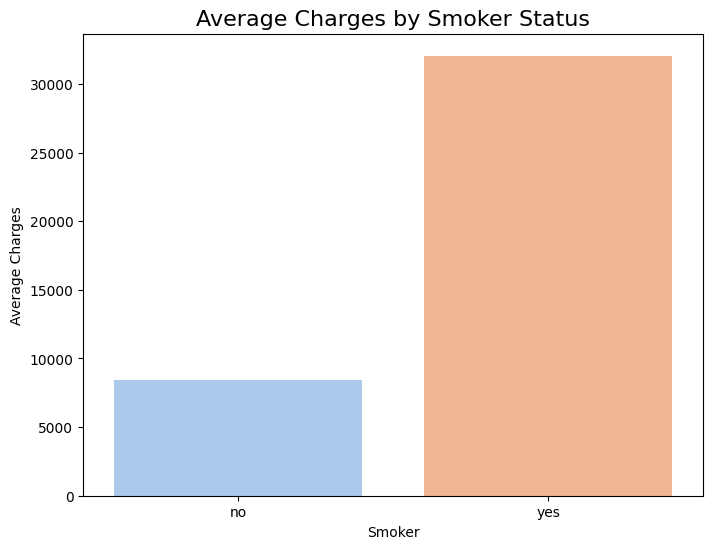

In [57]:
# Calculate the average charges for smokers and non-smokers
smoker_charges = df.groupby('smoker')['charges'].mean().reset_index()

# Bar plot of average charges by smoker status
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=smoker_charges, palette='pastel')
plt.title('Average Charges by Smoker Status', fontsize=16)
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()

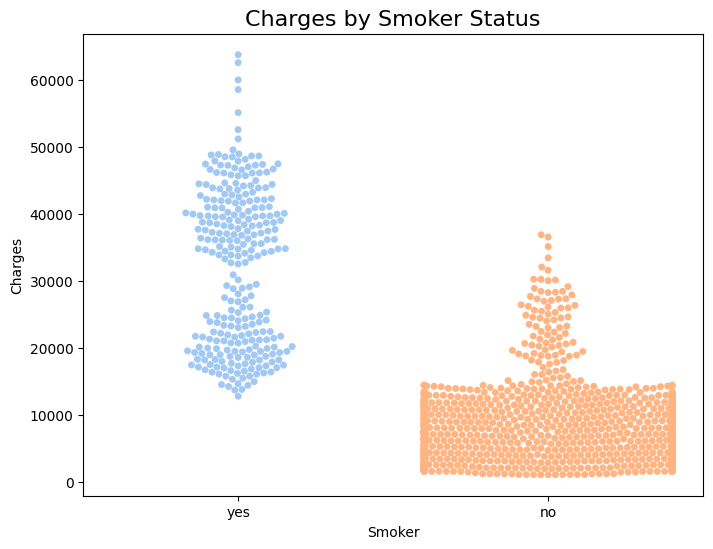

In [58]:
# Swarm plot of charges by smoker status
plt.figure(figsize=(8, 6))
sns.swarmplot(x='smoker', y='charges', data=df, palette='pastel', size=5)
plt.title('Charges by Smoker Status', fontsize=16)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

###region

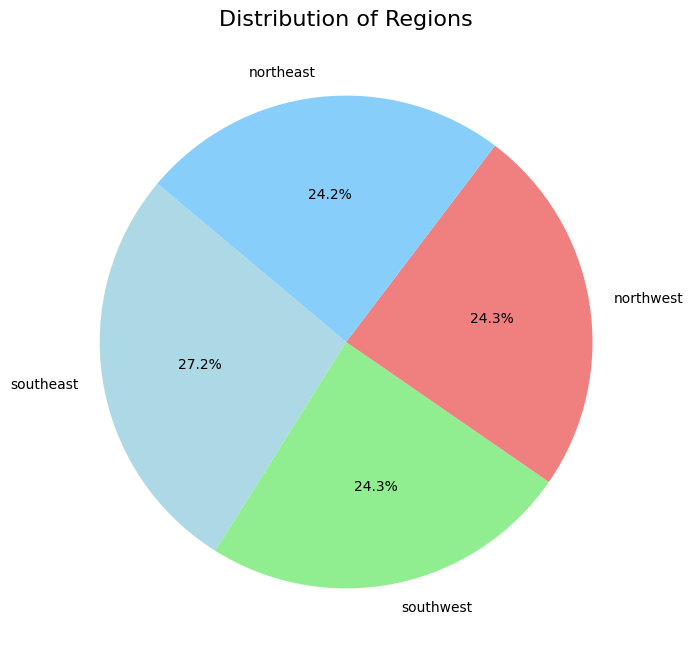

In [59]:
# Calculate the distribution of region
region_distribution = df['region'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_distribution, labels=region_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribution of Regions', fontsize=16)
plt.show()

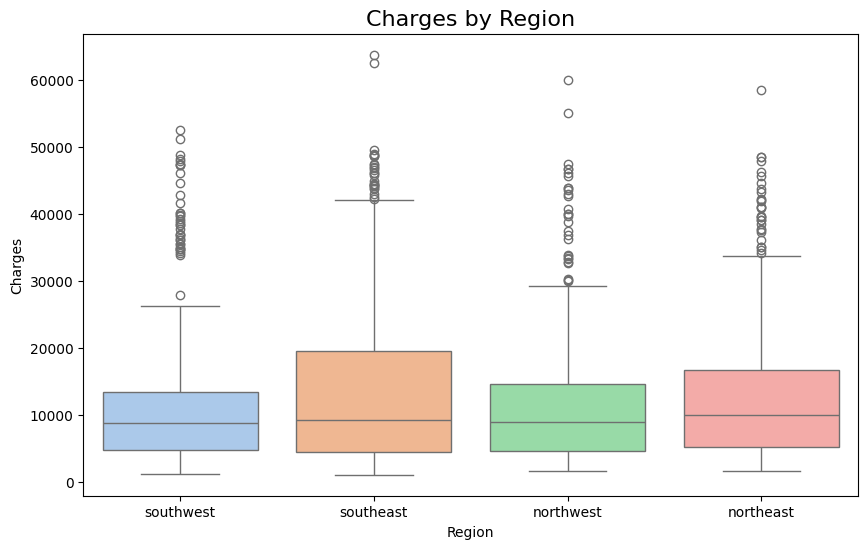

In [60]:
# Boxplot of charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, palette='pastel')
plt.title('Charges by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

In [61]:
# Calculate the average charges for each region
region_charges = df.groupby('region')['charges'].mean().reset_index()
region_charges.columns = ['Region', 'Average Charges']
region_charges

,Region,Average Charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


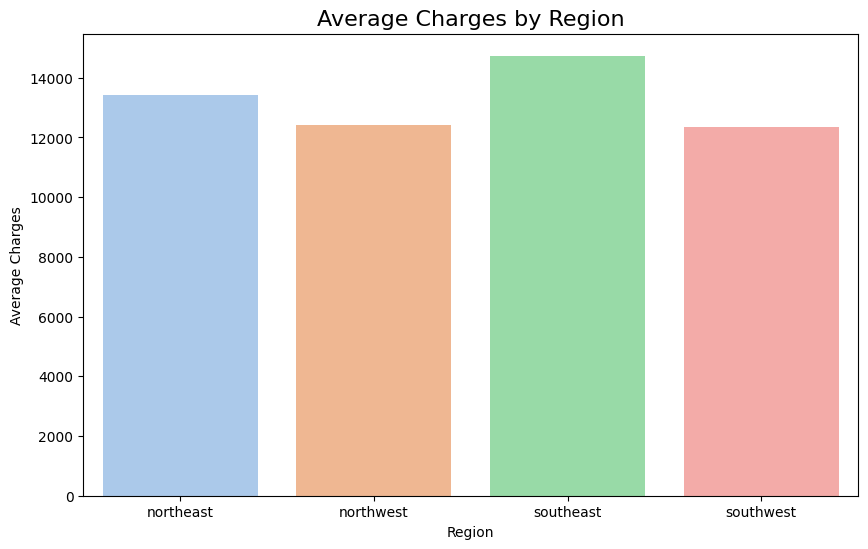

In [62]:
# Calculate the average charges for each region
region_charges = df.groupby('region')['charges'].mean().reset_index()

# Bar plot of average charges by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=region_charges, palette='pastel')
plt.title('Average Charges by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

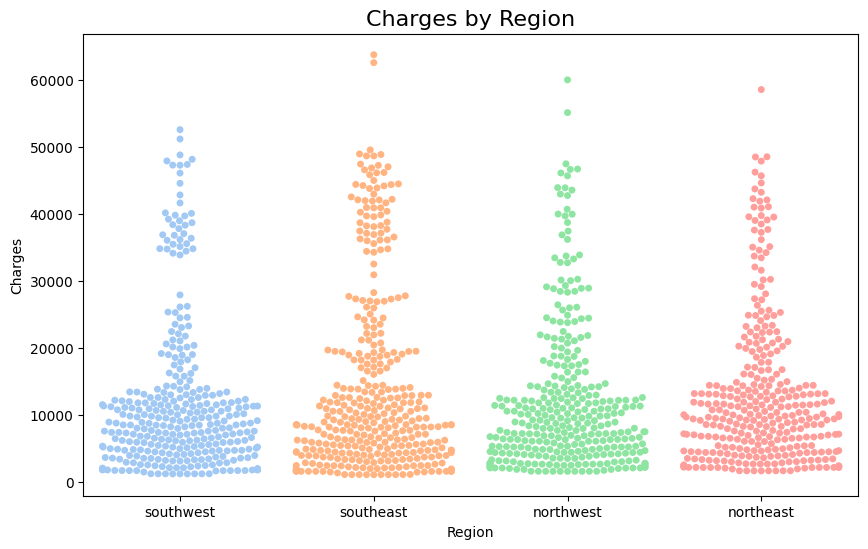

In [63]:
# Swarm plot of charges by region
plt.figure(figsize=(10, 6))
sns.swarmplot(x='region', y='charges', data=df, palette='pastel', size=5)
plt.title('Charges by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

##5.Predictive Modeling

###Model Training

####Data Preparating

In [64]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [65]:
# Prepare the features (X) and target (y)
X = df.drop(columns=['charges'])
y = df['charges']

In [66]:
# Identify categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

In [67]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_cols)  # Dummy encode categorical features
    ])

In [68]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Model Selection and Training

In [69]:
# List of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Support Vector Regression (SVR)': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'K-Nearest Neighbors Regression (KNN)': KNeighborsRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Huber Regression': HuberRegressor(),
    'Quantile Regression': QuantileRegressor(),
    'Principal Component Regression (PCR)': make_pipeline(PCA(), LinearRegression()),
    'Partial Least Squares Regression (PLS)': PLSRegression(),
    'Theil-Sen Estimator': TheilSenRegressor(),
    'RANSAC Regression': RANSACRegressor(),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Gradient Boosting Machines (GBM)': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'CatBoost': cb.CatBoostRegressor(verbose=0, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'Stochastic Gradient Boosting': GradientBoostingRegressor(subsample=0.5, random_state=42),
    'Quantile Boosting': GradientBoostingRegressor(loss='quantile', random_state=42)
}


In [70]:
# Function to train and evaluate each model
results = {'Model': [], 'MAE': [], 'MSE': [], 'R-squared': []}

for model_name, model in models.items():
    # Set the solver for QuantileRegressor to 'highs'
    if model_name == 'Quantile Regression':
        model.set_params(solver='highs')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results['Model'].append(model_name)
    results['MAE'].append(mean_absolute_error(y_test, y_pred))
    results['MSE'].append(mean_squared_error(y_test, y_pred))
    results['R-squared'].append(r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score 13346.089733


###Model Evaluation

In [71]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='R-squared', ascending= False, inplace=True)

# Display the results
results_df

,Model,MAE,MSE,R-squared
17,Gradient Boosting Machines (GBM),2404.901760,1.873286e+07,0.879336
22,Stochastic Gradient Boosting,2465.520777,1.936221e+07,0.875283
4,Polynomial Regression,2726.126538,2.070743e+07,0.866618
7,Random Forest Regression,2541.614594,2.100364e+07,0.864710
19,LightGBM,2603.213912,2.117487e+07,0.863607
21,HistGradientBoosting,2639.603340,2.150675e+07,0.861469
20,CatBoost,2647.002871,2.179081e+07,0.859639
18,XGBoost,2604.333804,2.245442e+07,0.855365
16,AdaBoost,4421.259251,2.774193e+07,0.821307
0,Linear Regression,4181.194474,3.359692e+07,0.783593


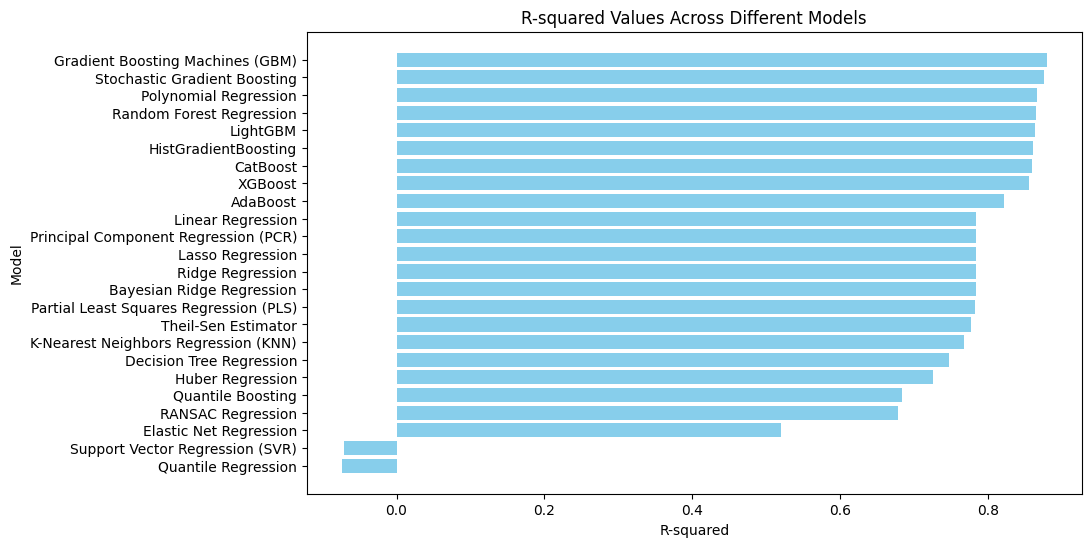

In [72]:
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.ylabel('Model')
plt.title('R-squared Values Across Different Models')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 11
[LightGBM] [Info] Start training from score 13346.089733


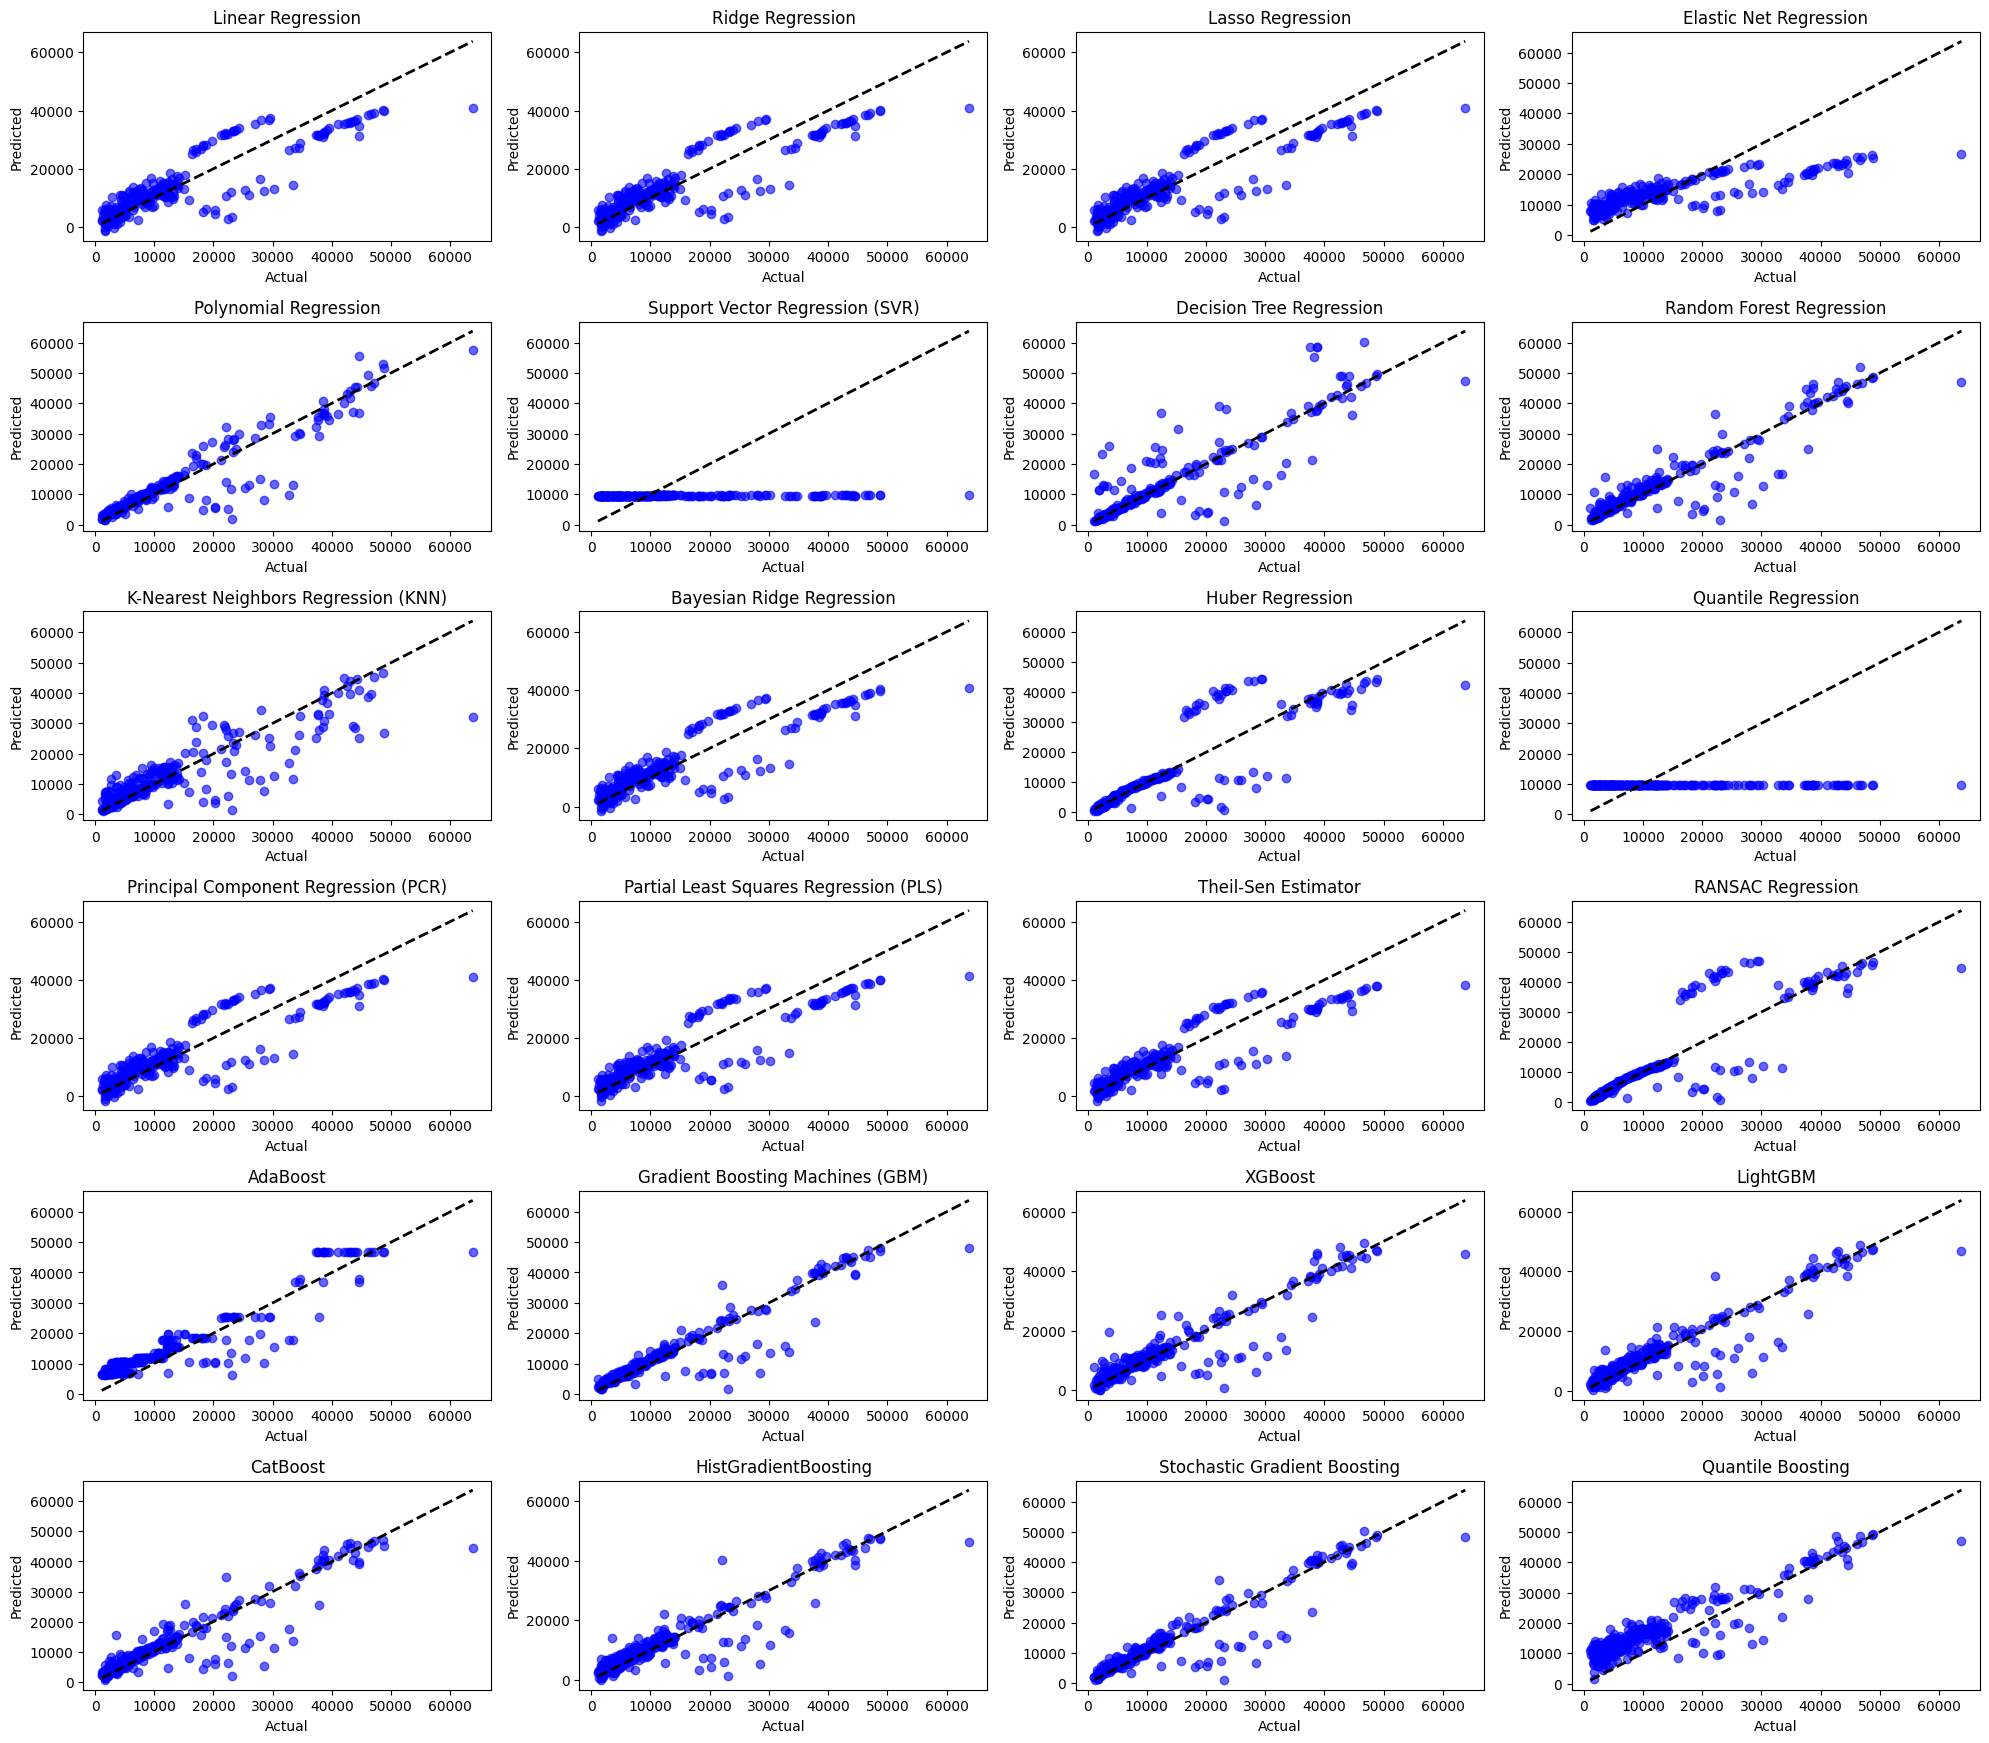

In [73]:
# Plotting the results
plt.figure(figsize=(20, 20))
n_models = len(models)
n_cols = 4
n_rows = (n_models // n_cols) + 1

for i, (model_name, model) in enumerate(models.items(), 1):
    # Pipeline for preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    # Generate predictions on the test data
    y_test_pred = pipeline.predict(X_test)

    # Subplot for each model
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(model_name)

plt.tight_layout()
plt.show()

###Best Model

In [74]:
# Define the Gradient Boosting Machines (GBM) model
gbm_model = GradientBoostingRegressor(random_state=42)

# Create a pipeline with preprocessing and the GBM model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', gbm_model)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Display the results
print(f"Model: Gradient Boosting Machines (GBM)")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")

Model: Gradient Boosting Machines (GBM)
MAE: 2404.90
MSE: 18732863.28
R-squared: 0.88


##6.Conclusion

**Best Model:**
- **Gradient Boosting Machines (GBM)** is the best model based on its R-squared value. It has the lowest error rates and the highest R-squared value, making it the most reliable predictor for this dataset.

**Other Strong Performers:**
- **Stochastic Gradient Boosting**, **Polynomial Regression**, **Random Forest**, and **LightGBM** also performed well and could be considered if further analysis or specific use cases favor them.

**Poor Performers:**
- **Quantile Regression** and **Support Vector Regression (SVR)** performed poorly and are not recommended for this task.
